In [2]:
import numpy as np
# Defined 3 points in 2D-space:
X=np.array([[2, 1, 0],[4, 3, 0]])
# Calculate the covariance matrix:
R = np.matmul(X,X.T)/3
# Calculate the SVD decomposition and new basis vectors:
[U,D,V]=np.linalg.svd(R)  # call SVD decomposition
u1=U[:,0] # new basis vectors
u2=U[:,1]

# Calculate the coordinates in new orthonormal basis:
Xi1 = np.matmul(np.transpose(X), u1)
Xi2 = np.matmul(np.transpose(X), u2)
# Calculate the approximation of the original from new basis
#print(Xi1[:,None]) # add second dimention to array and test it
Xaprox = np.matmul(u1[:, None], Xi1[None, :])
print(Xaprox)


# Check that you got the original

[[1.80720735 1.27357371 0.        ]
 [4.08528566 2.87897923 0.        ]]


This code creates a small 2D dataset and finds new best-fitting directions for the data using SVD (Singular Value Decomposition). It helps identify the most important patterns or axes in the data.

In [3]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[:])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


This code loads the Iris dataset, which contains measurements of flowers, and prints the feature names, the first five rows of data, and the class labels (flower types). It helps understand the dataset structure.

<function matplotlib.pyplot.show(close=None, block=None)>

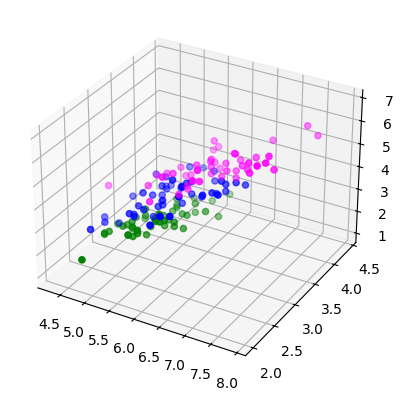

In [4]:
X=iris.data
y=iris.target
import matplotlib.pyplot as plt
axes1=plt.axes(projection='3d')
axes1.scatter3D(X[y==0,0],X[y==0,1],X[y==0,2],color='green')
axes1.scatter3D(X[y==1,0],X[y==1,1],X[y==1,2],color='blue')
axes1.scatter3D(X[y==2,0],X[y==2,1],X[y==2,2],color='magenta')
plt.show

This code visualizes the Iris dataset in a 3D scatter plot, using the first three features as coordinates. It colors the points based on their class (three flower species) to show how they are distributed.

In [5]:
print(np.min(X[:,0]))
print(np.max(X[:,0]))
print(np.min(X[:,1]))
print(np.max(X[:,1]))
print(np.min(X[:,2]))
print(np.max(X[:,2]))


4.3
7.9
2.0
4.4
1.0
6.9


This code finds and prints the minimum and maximum values for the first three features of the Iris dataset. It helps understand the range of values for each feature.

[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


array([0.72962445, 0.22850762, 0.03668922])

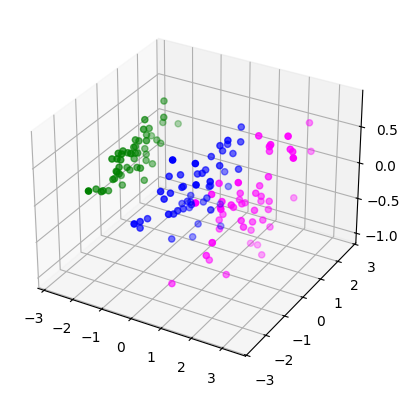

In [6]:
# Pre-processing is an important step, you can try either StandardScaler (zero mean, unit variance of features)
# or MinMaxScaler (to interval from 0 to 1)
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import decomposition
Xscaler = StandardScaler()
#Xscaler = MinMaxScaler()
Xpp=Xscaler.fit_transform(X)

# define PCA object (three components), fit and transform the data
pca = decomposition.PCA(n_components=3)
pca.fit(Xpp)
Xpca = pca.transform(Xpp)
print(pca.get_covariance())
# you can plot the transformed feature space in 3D:
axes2=plt.axes(projection='3d')
axes2.scatter3D(Xpca[y==0,0],Xpca[y==0,1],Xpca[y==0,2],color='green')
axes2.scatter3D(Xpca[y==1,0],Xpca[y==1,1],Xpca[y==1,2],color='blue')
axes2.scatter3D(Xpca[y==2,0],Xpca[y==2,1],Xpca[y==2,2],color='magenta')
plt.show

# Compute pca.explained_variance_ and pca.explained_cariance_ratio_values
pca.explained_variance_
pca.explained_variance_ratio_

This code scales the data using StandardScaler (zero mean, unit variance) and applies Principal Component Analysis (PCA) to reduce it to three dimensions. It then visualizes the transformed data in 3D and prints how much variance each principal component explains.

(120, 4)
(30, 4)
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


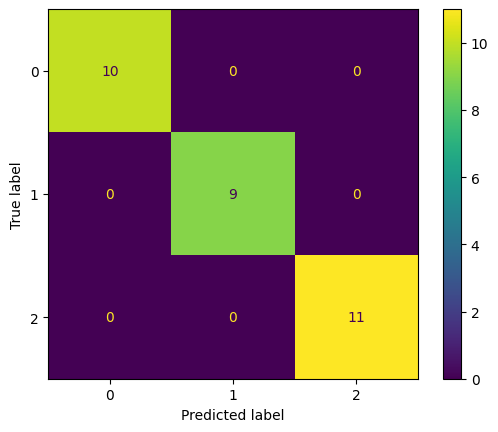

In [7]:
# Import train_test_split as in last PC lab, split X (original) into train and test, train KNN classifier on full 4-dimensional X

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xpp, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
knn1=KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_train, y_train)
Ypred = knn1.predict(X_test)
#Ypred=knn1.predict()
# Import and show confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
print(confusion_matrix(y_test, Ypred))
ConfusionMatrixDisplay.from_predictions(y_test, Ypred)

This code splits the dataset into training (80%) and testing (20%) sets, then trains a K-Nearest Neighbors (KNN) classifier with k=3 on the training data. It predicts test labels and evaluates performance using a confusion matrix.

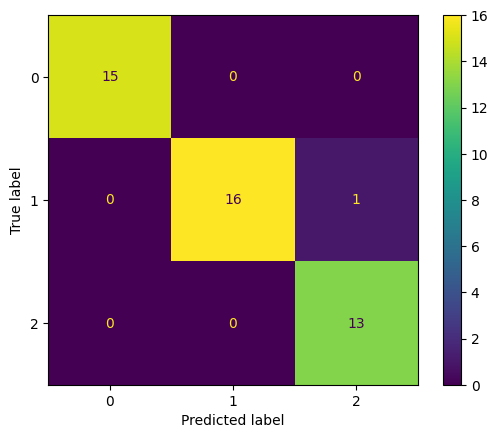

In [8]:
X_trainpca, X_testpca, y_trainpca, y_testpca = train_test_split(Xpca[:,:], y, test_size=0.3)
knn1=KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_trainpca, y_trainpca)
Ypredpca = knn1.predict(X_testpca)
# Import and show confusion matrix
confusion_matrix(y_testpca, Ypredpca)
ConfusionMatrixDisplay.from_predictions(y_testpca, Ypredpca)

This code splits the PCA-transformed data into training (70%) and testing (30%) sets, then trains a K-Nearest Neighbors (KNN) classifier with k=3. It predicts test labels and evaluates performance using a confusion matrix.

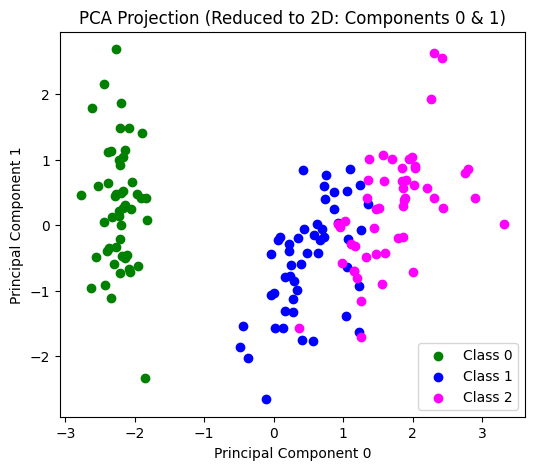

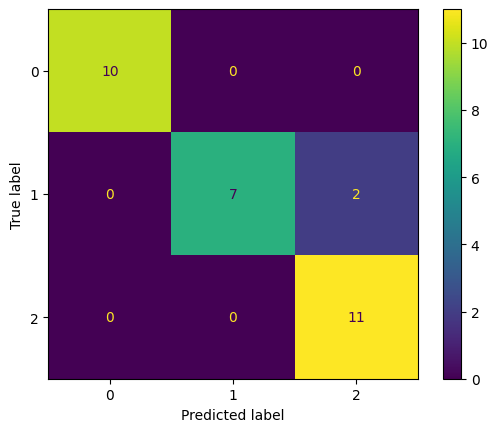

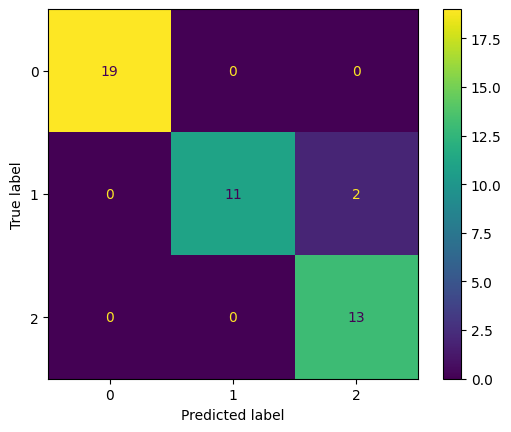

In [15]:
####   PCA with Components (0,1) + KNN Classification & Confusion Matrix


# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA and reduce to 2D (using components 0 and 1)
pca = decomposition.PCA(n_components=2)
X_pca_2d = pca.fit_transform(X_scaled)

# Plot PCA with components (0,1)
plt.figure(figsize=(6, 5))
plt.scatter(X_pca_2d[y == 0, 0], X_pca_2d[y == 0, 1], color='green', label='Class 0')
plt.scatter(X_pca_2d[y == 1, 0], X_pca_2d[y == 1, 1], color='blue', label='Class 1')
plt.scatter(X_pca_2d[y == 2, 0], X_pca_2d[y == 2, 1], color='magenta', label='Class 2')
plt.xlabel('Principal Component 0')
plt.ylabel('Principal Component 1')
plt.title('PCA Projection (Reduced to 2D: Components 0 & 1)')
plt.legend()
plt.show()


from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Split the reduced 2D PCA data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca_2d, y, test_size=0.2, random_state=42)

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict on test data
y_pred = knn.predict(X_test)

# Compute and display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)



# Split the 2D PCA data into 70% training and 30% testing sets
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca_2d, y, test_size=0.3, random_state=42)

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_pca, y_train_pca)

# Predict on test data
y_pred_pca = knn.predict(X_test_pca)

# Compute and display confusion matrix
conf_matrix_pca = confusion_matrix(y_test_pca, y_pred_pca)
ConfusionMatrixDisplay.from_predictions(y_test_pca, y_pred_pca)


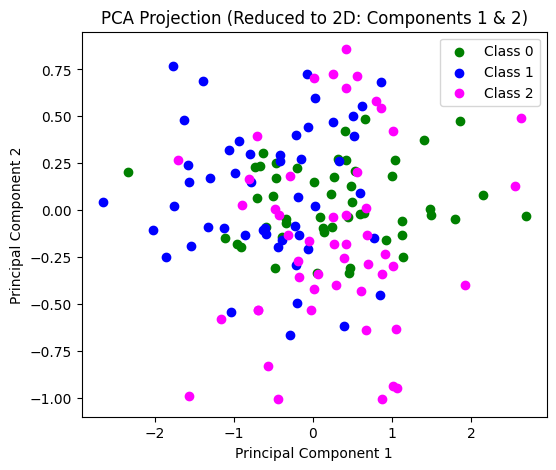

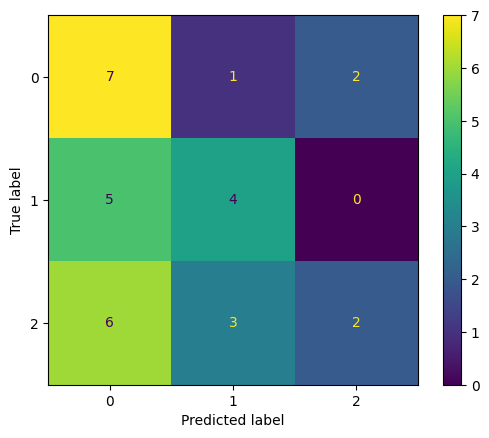

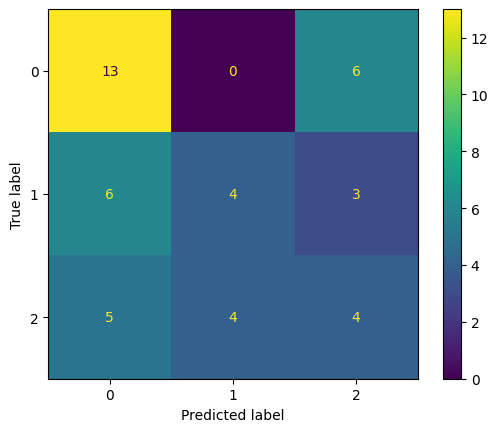

In [19]:
####   PCA with Components (1,2) + KNN Classification & Confusion Matrix

# Load and standardize the data
iris = load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA and reduce to 2D (using components 1 and 2)
pca = decomposition.PCA(n_components=4)
X_pca_full = pca.fit_transform(X_scaled)
X_pca_2d = X_pca_full[:, 1:3]  # Select components 1 and 2

# Plot PCA with components (1,2)
plt.figure(figsize=(6, 5))
plt.scatter(X_pca_2d[y == 0, 0], X_pca_2d[y == 0, 1], color='green', label='Class 0')
plt.scatter(X_pca_2d[y == 1, 0], X_pca_2d[y == 1, 1], color='blue', label='Class 1')
plt.scatter(X_pca_2d[y == 2, 0], X_pca_2d[y == 2, 1], color='magenta', label='Class 2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection (Reduced to 2D: Components 1 & 2)')
plt.legend()
plt.show()

# Split the 2D PCA data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca_2d, y, test_size=0.2, random_state=42)

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict on test data
y_pred = knn.predict(X_test)

# Compute and display confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

# Split the 2D PCA data into 70% training and 30% testing sets
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca_2d, y, test_size=0.3, random_state=42)

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_pca, y_train_pca)

# Predict on test data
y_pred_pca = knn.predict(X_test_pca)

# Compute and display confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test_pca, y_pred_pca)


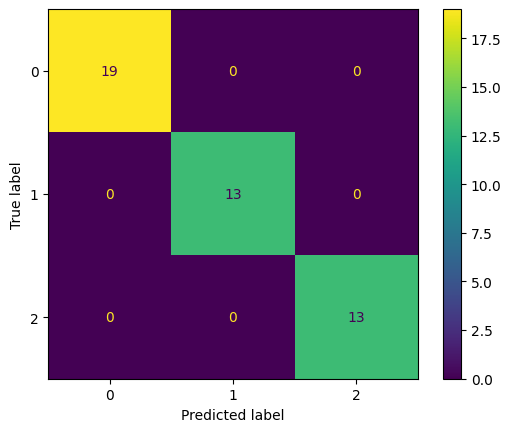

In [20]:
###### KNN Classification Using Xpp (Standardized Data)

# Load and standardize the dataset
iris = load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
Xpp = scaler.fit_transform(X)  # Standardized data

# Split the standardized data into 70% training and 30% testing sets
X_train, X_test, y_train, y_test = train_test_split(Xpp, y, test_size=0.3, random_state=42)

# Train KNN classifier on standardized data
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict on test data
y_pred = knn.predict(X_test)

# Compute and display confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
